# Introduction to Computer Programming



## Week 8.2: Symbolic computation with SymPy

* * *

<img src="img/full-colour-logo-UoB.png" alt="Bristol" style="width: 300px;"/>

# What is symbolic computation?

Symbolic computation is about performing exact mathematical operations that go beyond the basics like addition and multiplication (think differentiation and integration)

The idea is to introduce a new type of variable, called a **symbol**, that behaves like an algebraic variable.

Symbols can be operated on without having a precise value assigned to them.

This is different from the variable types we have seen so far (e.g. int, float), which need a value assigned to them when they are created

```python
x = 1.33
v = [1, 2, 3, 4]
```

# SymPy

**SymPy** is a Python library for carrying out exact computations using symbolic computing.

Features of SymPy include:

* Solving algebraic equations (linear equations, polynomials, nonlinear equations)
* Differentiating and integrating functions
* Solving linear algebra problems (linear systems, determinants, eigenvalue problems)
* Solving differential equations
* And much more: see https://www.sympy.org/en/index.html for more info!

# Getting started
To get started, let's load the SymPy library into Python:

In [1]:
from sympy import *

# Some special variables

SymPy has exact representations of useful mathematical quantities

* `pi` represents $\pi$
* `E` represents Euler's number $e$
* `oo` (two o's) represents infininty $\infty$
* `I` represents the complex number $i = \sqrt{-1}$

# Displaying maths

The `pprint` and `display` functions can be used to print and display mathematical expressions in Sypder (and also in Jupyter notebooks)

The `display` function works better, but it requires additional software (LaTeX) to be installed -- not an issue for the lab computers

**Note**: the `display` function uses black font, which is not very visible in the default Spyder scheme.  The Spyder colours can be changed by going to:

Tools -> Preferences -> Appearance -> Syntax highlighting scheme

**Example**: print $\pi^2$ using `pprint`, `display`, and using a Jupyter notebook

In [2]:
# printing pi**2 using pprint
pprint(pi**2)

 2
π 


In [3]:
# printing pi with the display function
display(pi**2)

pi**2

In [4]:
# printing with Jupyter notebook without display or pprint
pi**2

pi**2

**Examples**: Let's explore using some of these special variables

In [5]:
sin(pi)

0

In [6]:
log(E)

1

In [7]:
1 / oo

0

In [8]:
I**2

-1

# Defining variables as symbols

In order to make use of the capabilities of SymPy, we need to define variables as symbols.

This is done using the `symbols` function

In [9]:
x = symbols('x')

This creates a variable $x$ of type symbol.


Even though we haven't assigned a value to $x$, we can still perform operations on it and use it to define new variables

In [10]:
y = x + 1
display(y)

x + 1

This is the power of symbolic computing

# Defining mathematical functions

Once we define a symbol, we can use it to create mathematical functions.

**Example**: Define the function $y(x) = \sqrt{x}$

In [11]:
y = sqrt(x)

Values of $x$ can be substituted into $y$ using the `subs` method

**Example**: Substitute $x = 4$ into $y(x) = \sqrt{x}$

In [12]:
y.subs(x, 4)

2

Let's see what happens when we substitute $x = 8$ into the function $y = \sqrt{x}$

In [13]:
y.subs(x, 8)

2*sqrt(2)

The number $2\sqrt{2}$ is represented exactly as a symbol rather than being approximated by a float

The `evalf` method evaluates a symbolic expression as a floating point number

In [10]:
y_at_8 = y.subs(x, 8)
y_at_8.evalf()

2.82842712474619

There are some other ways we can do this.  The simplest is to substitute $x = 8.0$ into $y$, which automatically triggers the floating-point evaluation

In [11]:
y.subs(x, 8.0)

2.82842712474619

The substitution and evaluation can be done at the same time using dictionaries (helpful when substituting multiple values)

In [12]:
y.evalf(subs = {x:8})

2.82842712474619

#  Exercise:

Define the function 
\begin{align}
y(t) = \frac{t^2}{1 + 2t}.
\end{align}
Then evaluate $y(2)$ exactly and find a floating-point approximation to this value

# Solution:

In [22]:
# create the symbol t and define the function y
t = symbols('t')
y = t**2 / (1 + 2*t)

# computing y(2) exactly and displaying the value
y_at_2 = y.subs(t,2)
display(y_at_2)

# finding a floating-point approx to y(2) and displaying the value
display(y_at_2.evalf())

4/5

0.800000000000000

# Plotting functions

SymPy enables plotting of functions using the matplotlib package, which will be covered in more detail next week.

Functions can be plotted using the `plot` function

**Example**: Plot the function $y(x) = \sin(x^2)$

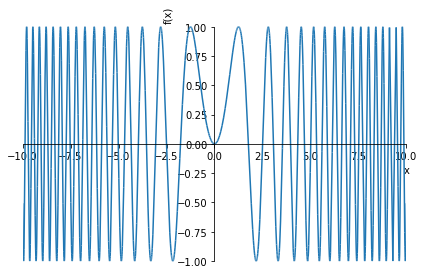

In [3]:
y = sin(x**2)
plot(y)

It is possible to specify plotting range by passing a tuple to the `plot` function

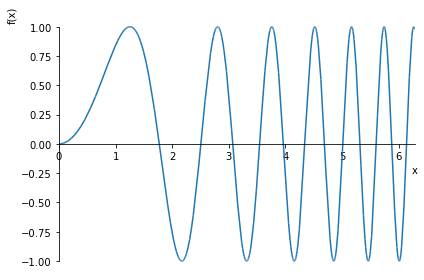

In [5]:
plot(y, (x, 0, 2 * pi))

# Differentiating functions

The `diff` function enables functions to be differentiated an arbitrary number of times

**Example**: Compute $y'$ and $y'''$ when $y = \sqrt{x}$

In [13]:
y = sqrt(x)
diff(y,x)

1/(2*sqrt(x))

In [14]:
diff(y, x, 3)

3/(8*x**(5/2))

# Exercise:

Plot the function $y(x) = \cos(4 \pi x) e^{-3 x}$ from $x = 0$ to $x = 2$.  Compute $y'''(1)$.  

**Hint**: use the `cos` and `exp` functions for the cosine and exponential

# Solution:

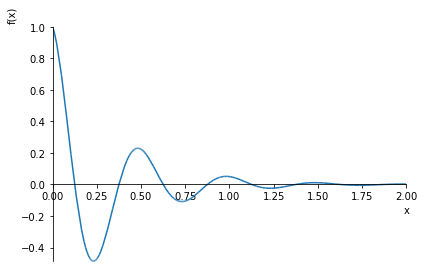

(-27 + 144*pi**2)*exp(-3)

In [27]:
y = cos(4 * pi * x) * exp(-3 * x)

# plotting
plot(y, (x, 0, 2))

# computing y'''(1)
v = diff(y, x, 3).subs(x, 1)
display(v)

# Integrating functions

The `integrate` function computes the indefinite integral of a function (if it exists)

**Example**: Compute the indefinite integral of $y = x$

In [4]:
y = x
integrate(y, x)

x**2/2

**Warning**: SymPy does not add the constant of integration to indefinite integrals!

The `integrate` function can also handle definite integrals.

**Example**: Compute
$$ 
\int_{0}^{1} x^2\, dx
$$

In [5]:
integrate(x**2, (x, 0, 1))

1/3

**Example**: Compute the following integral exactly and approximately
$$
\int_{0}^{\infty} \frac{\sin x}{x}\, dx
$$

In [8]:
# compute the exact value
integrate(sin(x) / x, (x, 0, oo))

pi/2

In [6]:
# compute a floating-point approximation to the integral
integrate(sin(x) / x, (x, 0, oo)).evalf()

1.57079632679490

# Solving an equation

The `solve` function solves algebraic equations of the form $F(x) = 0$

**Example**: Solve $x^3 = a x$ where $a$ is a parameter

**Solution**: First we write this as $F(x) = x^3 - ax = 0$

In [30]:
# define a and x as symbols
a, x = symbols('a x')

# define the function and solve
F = x**3 - a * x
solve(F, x)

[0, -sqrt(a), sqrt(a)]

# Summary

SciPy performs **exact** mathematical calculations using **symbolic computing**

* `symbols` is used to define algebraic variables
* `subs` and `evalf` are for substituting values and computing floating-point approximations
* `diff` and `integrate` compute derivatives and integrals
* `solve` solves algebraic equations

This is very useful for calculus homework!

For more details of SymPy, see https://www.sympy.org/en/index.html